## Fitting a line and removing outliers 

In [3]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from numpy.linalg import inv,pinv
from numpy import dot,power
from utils import *

#### Generate Data with outliers 

Text(0.5,1,'Data points')

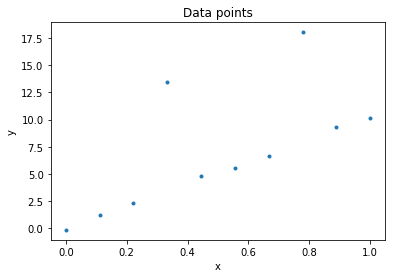

In [37]:
nb_var_in = 1 #Dimension of input vector
nb_var_out = 1 #Dimension of output vector
nb_data = 10  #Number of datapoints
nb_iter = 10 #number of re-weighting iterations
p = 1 #L1 norm

A0 = np.random.rand(nb_var_in,nb_var_out)*20
X = np.linspace(0,1,nb_data)[:,None]
Y = dot(X,A0) + np.random.normal(size=(nb_data,nb_var_out), scale = 0.2)
#add outliers
Y[3] += 10
Y[7] += 10
plt.plot(X,Y, '.')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data points')

### Question 1: Fit a line to the data above, while removing the outliers 

#### Standard Least Squares 

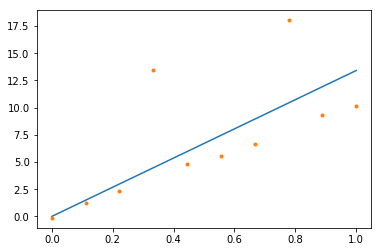

In [38]:
A = dot(pinv(X),Y)
Y_pred = dot(X,A)
plt.plot(X,Y_pred)
plt.plot(X,Y,'.')

#### RLS 

In [39]:
#Calculate IRLS
W = np.eye(nb_data)
res_set = []
for i in range(nb_iter):
    Aw = dot(inv(dot(X.T,dot(W,X))),dot(X.T, dot(W,Y)))
    diff = np.abs(Y-dot(X,Aw)).flatten()
    res_set.append(np.sum(diff))
    W = np.diag(diff**(p-2))

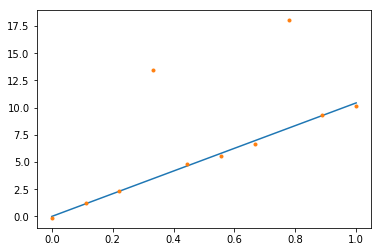

In [40]:
Y_pred = dot(X,Aw)
plt.plot(X,Y_pred)
plt.plot(X,Y,'.')

#### Load Laser Data 

In [4]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from mpl_toolkits.mplot3d import Axes3D

In [11]:
ROOT_DIR = '../python_data/laser_profile/'
file_name = ROOT_DIR +'laser_data.npy'
data = np.load(open(file_name,'rb'))

#### Plot data 

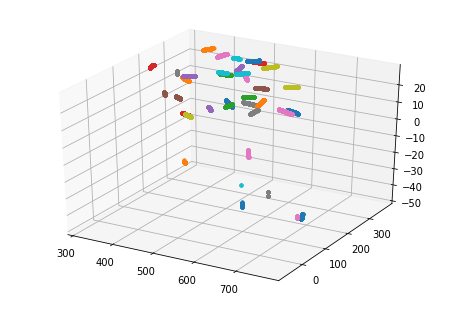

In [12]:
%matplotlib qt
fig = plt.figure()
ax = Axes3D(fig)
for i in range(data.shape[0]):
    ax.plot3D(data[i,:,0], data[i,:,1], data[i,:,2],'.' )

#### Question 1: The data points in the above figures are located on a plane, but there are a few outliers. Fit a plane to the data points using linear regression with L1 norm, and then remove the outliers. (Hint: use the equation of plane, ax + by + cz = d)  

#### Solution 

In [13]:
data = data.reshape([-1,3])

#### Formulate a linear regression problem of AX = B

In [14]:
A = np.vstack([data[:,0], data[:,1], -np.ones(data.shape[0])]).T
B = -1*data[:,2]

#### Standard LS 

In [15]:
X = dot(pinv(A),B)

Z = -dot(A,X)

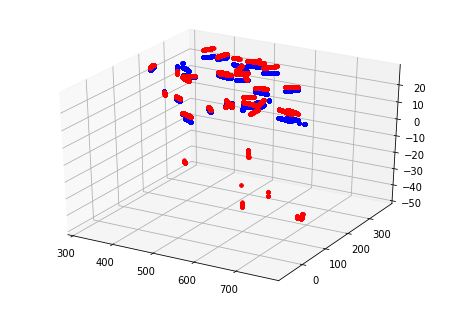

In [16]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot3D(data[:,0],data[:,1],Z,'.b')
ax.plot3D(data[:,0],data[:,1],data[:,2],'.r')

#### IRLS for L1 norm linear regression 

In [17]:
#Calculate IRLS
nb_data = data.shape[0]
W = np.eye(nb_data)
res_set = []
p = 1
for i in range(20):
    Xw = dot(inv(dot(A.T,dot(W,A))),dot(A.T, dot(W,B)))
    diff = np.abs(B-dot(A,Xw)).flatten()
    res_set.append(np.sum(diff))
    W = np.diag(diff**(p-2))
Z2 = -dot(A,Xw)

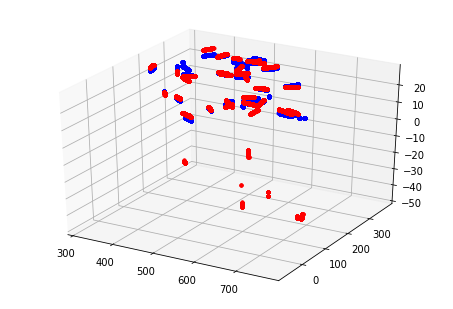

In [19]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot3D(data[:,0],data[:,1],Z2,'.b')
ax.plot3D(data[:,0],data[:,1],data[:,2],'.r')

In [37]:
%matplotlib qt
fig = plt.figure()
ax = Axes3D(fig)
ax.plot3D(data[:,0],data[:,1],Z2,'.b')
ax.plot3D(data[:,0],data[:,1],Z,'.r')
ax.set_ylim([-100,400])
ax.set_xlim([300,800])
ax.set_zlim([-10,35])

(-10, 35)

#### Remove Outliers 

In [20]:
diff = np.abs(B - dot(A,Xw)).flatten()
std_dev = np.std(diff)
mean_data = np.mean(diff)
selected_index = np.abs(diff-mean_data) < 3*std_dev

In [21]:
data_filtered = data[selected_index]

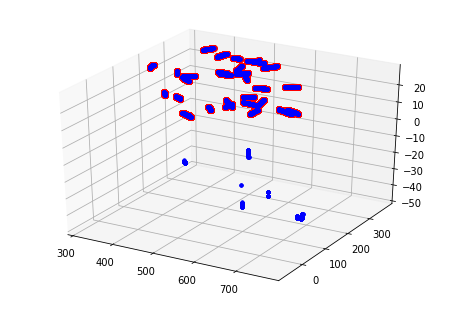

In [24]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot3D(data_filtered[:,0],data_filtered[:,1],data_filtered[:,2],'or')
ax.plot3D(data[:,0],data[:,1],data[:,2],'.b')